In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import geopandas
from shapely import wkt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/uhfaljhjuu/.csv
/kaggle/input/1geopandas/3.shp
/kaggle/input/uhfaljhju/╨ô╤Ç╨░╤ä ╨┤╨╛╤Ç╨╛╨│ ╨£╨╛╤ü╨║╨▓╤ï.prj
/kaggle/input/uhfaljhju/╨ô╤Ç╨░╤ä ╨┤╨╛╤Ç╨╛╨│ ╨£╨╛╤ü╨║╨▓╤ï.shp
/kaggle/input/uhfaljhju/╨ô╤Ç╨░╤ä ╨┤╨╛╤Ç╨╛╨│ ╨£╨╛╤ü╨║╨▓╤ï.cpg
/kaggle/input/uhfaljhju/╨ô╤Ç╨░╤ä ╨┤╨╛╤Ç╨╛╨│ ╨£╨╛╤ü╨║╨▓╤ï.dbf
/kaggle/input/uhfaljhju/╨ô╤Ç╨░╤ä ╨┤╨╛╤Ç╨╛╨│ ╨£╨╛╤ü╨║╨▓╤ï.qpj
/kaggle/input/uhfaljhju/╨ô╤Ç╨░╤ä ╨┤╨╛╤Ç╨╛╨│ ╨£╨╛╤ü╨║╨▓╤ï.shx


# Import граф дорог .shp and .csv

In [3]:
graf_dorog_shp = geopandas.read_file('../input/uhfaljhju/╨ô╤Ç╨░╤ä ╨┤╨╛╤Ç╨╛╨│ ╨£╨╛╤ü╨║╨▓╤ï.shp', crs_wkt='EPSG:4326')

In [4]:
graf_dorog_csv = pd.read_csv('../input/uhfaljhjuu/.csv', sep=';')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (22) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Построим полигоны из графа дорог

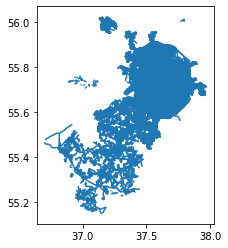

In [11]:
graf_dorog_shp.geometry.plot()

# Создаем фичи с координатами начала и конца полигона, длинной и площадью

In [13]:
graf_dorog_csv['geom_point_x'] = graf_dorog_shp.geometry.representative_point().x
graf_dorog_csv['geom_point_y'] = graf_dorog_shp.geometry.representative_point().y
graf_dorog_csv['geom_buffer_point_x'] = graf_dorog_shp.geom_buffer.representative_point().x
graf_dorog_csv['geom_buffer_point_y'] = graf_dorog_shp.geom_buffer.representative_point().y
graf_dorog_csv['geom_buffer_area'] = graf_dorog_shp.geom_buffer.area
graf_dorog_csv['geometry_length'] = graf_dorog_shp.geometry.length
graf_dorog_csv['geom_buffer_length'] = graf_dorog_shp.geom_buffer.length

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


# записываем в файл train_new

In [14]:
graf_dorog_csv.to_csv('train_new.csv')